# Introduction to Biopython, Jupyter, and Github

# Section 1: Biopython

Biopython is super dope!  Let's get started!

## Section 1.1: Installing Biopython

Anaconda makes it very simple to install packages.  One way you can install Biopython is by going to `Anaconda Navigator > Environments > Base > search for Biopython > Apply`.  Alternatively, you can open up `Anaconda Promopt` and type `conda install biopython`.

Once that's complete, you should be able to open Spyder and type `from Bio.Seq import Seq`.  If so, you're all set!

Before we get started, download this file.  It contains all the data we will be using today.

## Section 1.2: Working With Sequence Objects


Sequence objects, or `Seq`s, are the foundation upon which Biopython is built.  A `Seq` object is made up of a `sequence` and an `alphabet`.

In [1]:
from Bio.Seq import Seq
from Bio.Alphabet import IUPAC
my_seq = Seq("GATCGATGGGCCTATATAGGATACGAAAATCGC", IUPAC.unambiguous_dna)
my_seq

Seq('GATCGATGGGCCTATATAGGATACGAAAATCGC', IUPACUnambiguousDNA())

In [2]:
print(my_seq)

GATCGATGGGCCTATATAGGATACGAAAATCGC


Because `Seq`s are subclasses of `str`, it inherits all of the `str` class methods.  For example:

In [3]:
len(my_seq)

33

In [4]:
my_seq[0]

'G'

In [5]:
my_seq[-1]

'C'

In [6]:
print(my_seq[0:20])

GATCGATGGGCCTATATAGG


In [7]:
for base in my_seq[:5]:
    print(base)

G
A
T
C
G


In [8]:
print(my_seq.lower())

gatcgatgggcctatataggatacgaaaatcgc


In [9]:
'ATA' in my_seq

True

We can also count the number of (non-overlapping) occurrences of a substring:

In [10]:
my_seq.count("ATA")

2

If you want to count the number of overlapping occurrences, use the `Seq.count_overlap` function.

In [11]:
my_seq.count_overlap("ATA")

3

We can use `str.count()` to calculate the GC content of a sequence:

In [182]:
def get_gc_content(seq):
        '''
            Returns the gc content of a sequence 
        '''
        return (seq.count("G") + seq.count("C")) / len(seq)

get_gc_content(my_seq)

0.45454545454545453

Calculating the GC content of a string in this way doesn't account for the ambiguous nucleotide S.  The `GC` function in `Bio.SeqUtils` can handle such cases.

In [183]:
ambig_string = Seq("ATGCRAGCTSGSTRSTGCGGCGASSGAGSARRRGSSA", IUPAC.ambiguous_dna)
get_gc_content(ambig_string)

0.3783783783783784

In [14]:
from Bio.SeqUtils import GC
GC(ambig_string)

59.45945945945946

In [15]:
GC(my_seq)

45.45454545454545

You can also slice `Seq` objects as you would a string.  For instance, we can get the first ten characters:

In [16]:
ambig_string[:10]

Seq('ATGCRAGCTS', IUPACAmbiguousDNA())

We can print out every other character:

In [17]:
ambig_string[::2]

Seq('AGRGTGTSGGCASASRRSA', IUPACAmbiguousDNA())

Every third position:

In [18]:
ambig_string[::3]

Seq('ACGSTTGGSGRGA', IUPACAmbiguousDNA())

And we can shift our reading frame on the sequence:

In [19]:
ambig_string[1::3]

Seq('TRCGRGGAGSRS', IUPACAmbiguousDNA())

In [20]:
ambig_string[2::3]

Seq('GATSSCCSAARS', IUPACAmbiguousDNA())

We can also reverse the string:

In [21]:
ambig_string[::-1]

Seq('ASSGRRRASGAGSSAGCGGCGTSRTSGSTCGARCGTA', IUPACAmbiguousDNA())

Note that slicing a `Seq` returns another `Seq`, so anything you can do with a `Seq` you can do with a slice of a `Seq`.  

In [22]:
GC(ambig_string[:10])

50.0

There may be times where you just need a plain string version of a sequence; for instance, when writing to a file or a database.  

In [23]:
with open('test-1.1', 'w') as fout:
    fout.write(ambig_string)

TypeError: write() argument must be str, not Seq

We get a `TypeError` because `write` expects a string object and doesn't know what to do with a `Seq`.  So even though `Seq` plays nicely with `print` and many other functions, there are still several that don't.  In these cases, we can coerce a `Seq` to a string using Python's built-in `str` function:

In [24]:
with open('test-1.1', 'w') as fout:
    fout.write(str(ambig_string))

Note, though, that using string formatting avoids this problem since `format` coerces `Seq` objects to strings.

In [25]:
with open('test-1.1-2', 'w') as fout:
    fout.write("See? \n{}".format(ambig_string))

We can also concatenate sequences with `+` just as you would strings.  As you would expect, the result is also a sequence object.  We'll concatenate `my_seq`, which has the `IUPACUnambiguousDNA` alphabet, and `ambig_string`, which has the `IUPACAmbiguousDNA` alphabet.  Which alphabet will their concatenation have?  

In [26]:
my_seq + ambig_string

Seq('GATCGATGGGCCTATATAGGATACGAAAATCGCATGCRAGCTSGSTRSTGCGGC...SSA', IUPACAmbiguousDNA())

Since their concatenation has ambiguous bases, its alphabet is `IUPACAmbiguousDNA`.

Alphabets ensure that we only concatenate compatible sequences.  For example, let's create a protein sequence and try to concatenate it to `my_seq`:

In [27]:
my_prot = Seq("EVRNAK", IUPAC.protein)
my_prot

Seq('EVRNAK', IUPACProtein())

In [28]:
my_prot + my_seq

TypeError: Incompatible alphabets IUPACProtein() and IUPACUnambiguousDNA()

We get another `TypeError` telling us that the two alphabets are incompatible - because we told Biopython what kind of sequences `my_prot` and `my_seq` are by explicitly choosing their alphabet, it prevents us from combining the sequences.  

We can use a `for` loop to concatenate multiple sequences together:

In [29]:
sequences = [Seq("AGCGATGTTACGCATCAGGGCAGTCGCCCTAAAACAAAGTTAGGCCGC", IUPAC.unambiguous_dna),
            Seq("CCGGTTGGTAACGGCGCAGTGGCGGTTTTCAT", IUPAC.unambiguous_dna),
            Seq("CACAGCGGTTTTCAT", IUPAC.unambiguous_dna),
            Seq("AACGGCGCATGGCGGTTTTCAT", IUPAC.unambiguous_dna),
            Seq("AGTGGCGGTTTTCAT", IUPAC.unambiguous_dna)]

concatenated_sequences = ''
for seq in sequences:
    concatenated_sequences += seq
    
concatenated_sequences

Seq('AGCGATGTTACGCATCAGGGCAGTCGCCCTAAAACAAAGTTAGGCCGCCCGGTT...CAT', IUPACUnambiguousDNA())

#### Exercise 1.2.1

* Just a quick Python refresher - loop through `sequences` and print out "Sequence number ... is ... characters long."
* Let's say you *really* wanted to concatenate `my_prot` and `my_seq` for some reason.  How would you do that?

`Seq`s have a lot of useful methods:

In [30]:
print([attr for attr in dir(my_seq) if not attr.startswith("_")])

['alphabet', 'back_transcribe', 'complement', 'count', 'count_overlap', 'endswith', 'find', 'lower', 'lstrip', 'reverse_complement', 'rfind', 'rsplit', 'rstrip', 'split', 'startswith', 'strip', 'tomutable', 'tostring', 'transcribe', 'translate', 'ungap', 'upper']


Because `Seq`s are subclasses of strings, they are immutable:

In [61]:
my_seq[0] = "T"

TypeError: 'Seq' object does not support item assignment

It can be useful sometimes to be able to change individual bases, though - say, if you're simulating mutations on a sequence.  The `tomutable` method provides a way of changing individual characters in a sequence:

In [57]:
my_mutable_seq = my_seq.tomutable()
my_mutable_seq

MutableSeq('GATCGATGGGCCTATATAGGATACGAAAATCGC', IUPACUnambiguousDNA())

Notice that the type changed from `Seq` to `MutableSeq`.  Now we can change the contents of the sequence:

In [63]:
my_mutable_seq[0] = 'T'
my_mutable_seq

MutableSeq('TATCGATGGGTCTATATAGGATACGAAAATCGC', IUPACUnambiguousDNA())

In [65]:
my_mutable_seq[-1] = "T"
my_mutable_seq

MutableSeq('TATCGATGGGTCTATATAGGATACGAAAATCGT', IUPACUnambiguousDNA())

And when you're done making changes to the string, you can convert it back to a `Seq` object via `.toseq`:

In [67]:
new_seq = my_mutable_seq.toseq()
new_seq

Seq('TATCGATGGGTCTATATAGGATACGAAAATCGT', IUPACUnambiguousDNA())

For example, we can transcribe and translate:

In [31]:
my_seq_transcript = my_seq.transcribe()
my_seq_transcript

Seq('GAUCGAUGGGCCUAUAUAGGAUACGAAAAUCGC', IUPACUnambiguousRNA())

Notice that the alphabet changed to `IUPACUnambiguousRNA`.  We can now translate this to protein: 

In [35]:
my_transcript_protein = my_seq_transcript.translate()
my_transcript_protein

Seq('DRWAYIGYENR', IUPACProtein())

We can also go straight from DNA to protein.  

In [36]:
coding_dna = Seq("ATGGCCATTGTAATGGGCCGCTGAAAGGGTGCCCGATAG", IUPAC.unambiguous_dna)
coding_dna.translate()

Seq('MAIVMGR*KGAR*', HasStopCodon(IUPACProtein(), '*'))

The `*` here indicates a stop codon.  In other words, our sequence has an internal stop codon.  This translation isn't realistic, though - when a stop codon is encountered, translation is supposed to stop.  We can pass `True` to the `to_stop` argument of `translate()` to achieve this behavior:

In [37]:
coding_dna.translate(to_stop = True)

Seq('MAIVMGR', IUPACProtein())

We can be more realistic by telling Biopython to only start translation where it finds a start codon.  We do this by passing `cds = True` when we call `translate`.  Doing so tells Biopython that the sequence we are translating is a complete coding sequence (CDS), which means the sequence:

* has a whole number of codons (ie, the number of bases is a multiple of 3)
* begins with a start codon
* ends with a stop codon
* and has no internal stop codons

Let's see what happens when we try to pass `cds = True` when we translate `coding_dna`:

In [38]:
coding_dna.translate(cds = True)

TranslationError: Extra in frame stop codon found.

The relevant part of this error message is the very bottom: `TranslationError: Extra in frame stop codon found`. Since we passed `cds = True` to `translate`, its not expecting any internal stop codons.  Thus, because `coding_dna` has an internal stop codon, translation as a CDS fails.  Here's an example where it works:

In [40]:
cds_seq = Seq('ATGGCCATTGTAATGTAG', IUPAC.unambiguous_dna)
cds_seq.translate(cds = True)

Seq('MAIVM', IUPACProtein())

Remove `cds = True` and rerun the above code.  What's different in the output?

Now suppose we have a CDS that has a non-standard start codon.  For instance, `GTG` is a valid start codon for bacteria.  Take the following bacterial gene as an example:

In [44]:
from Bio.Alphabet import generic_dna
bac_gene = Seq("GTGAAAAAGATGCAATCTATCGTACTCGCACTTTCCCTGGTTCTGGTCGCTCCCATGGCA" + 
           "GCACAGGCTGCGGAAATTACGTTAGTCCCGTCAGTAAAATTACAGATAGGCGATCGTGAT" + 
           "AATCGTGGCTATTACTGGGATGGAGGTCACTGGCGCGACCACGGCTGGTGGAAACAACAT" + 
           "TATGAATGGCGAGGCAATCGCTGGCACCTACACGGACCGCCGCCACCGCCGCGCCACCAT" + 
           "AAGAAAGCTCCTCATGATCATCACGGCGGTCATGGTCCAGGCAAACATCACCGCTAA", generic_dna)

`bac_gene` is a valid CDS; however, the table that `translate` uses for translation is the Standard Code ([NCBI table 1][ncbi-tables]), which doesn't recognize `GTG` as a start codon.  Thus, when we try to translate it using `cds = True`:

[ncbi-tables]: https://www.ncbi.nlm.nih.gov/Taxonomy/Utils/wprintgc.cgi

In [46]:
bac_gene.translate(cds = True)

TranslationError: First codon 'GTG' is not a start codon

We get another `TranslationError`.  Again, because we told `translate` that we are passing it a CDS, it expects to find a start codon at the beginning of the sequence.  Since `translate` defaults to the Standard Code, it doesn't recognize `GTG` as a start codon.  However, we can tell `translate` to use a different table when performing translation via the `table` argument. Since we know our gene is a bacteria, we can find the appropriate table and pass it to `translate`.

### Exercise 1.2.1
* Verify for yourself that `bac_gene` is a valid CDS.
* Look through the translation tables on [NCBI][ncbi-tables] and determine which table we should use.  Translate `bac_gene` with the appropriate arguments.
* Alternatively,you can just call `translate` without providing a table or setting `cds = True`.  What's different?

[ncbi-tables]: https://www.ncbi.nlm.nih.gov/Taxonomy/Utils/wprintgc.cgi

Biopython also includes ways to query online databases.  For example, you can query BLAST through Biopython via `qblast`.  `qblast` takes three arguments:

* which blast program you want to use.  `qblast` currently only supports `blastn`, `blastp`, `blastx`, `tblast`, and `tblastx`.  
* the database to search against [options here][ncbi-options]
* a string containing your query sequence, either as the sequence itself, the sequence in fasta format, or an identifier

A note - querying NCBI remotely like this can be very very slow.  In practice, you would create a local database (usually on an HPC) and query that instead.  However, since we're only querying a few sequences today, we'll do remote queries.

Let's do a BLAST search:

[ncbi-options]: http://www.ncbi.nlm.nih.gov/BLAST/blast_databases.shtml

In [148]:
from Bio.Blast import NCBIWWW
result_handle = NCBIWWW.qblast("blastn", "nt", "8332116")

`qblast` returns a temporary XML file that we can read the BLAST output from.  Before we go on, it's recommended to save a copy of your BLAST results locally; it's faster to debug your code by referring to a local copy of the results instead of having to query NCBI every time, which is a waste of your time and NCBI's resources.  You can save the results like this:

In [149]:
with open('my_blast_results.xml', 'w') as fout:
    fout.write(result_handle.read())
result_handle.close()

When you want to load the XML and read the results, do:

In [150]:
from Bio.Blast import NCBIXML

result_handle = open('my_blast_results.xml')
blast_records = NCBIXML.parse(result_handle) 

E_THRESHHOLD = 0.04

for record in blast_records:
    for alignment in record.alignments:
        for hsp in alignment.hsps:
            if hsp.expect < E_THRESHHOLD:
                print('****Alignment****')
                print('sequence:', alignment.title)
                print('length:', alignment.length)
                print('e value:', hsp.expect)
                print(hsp.query[0:75] + '...')
                print(hsp.match[0:75] + '...')
                print(hsp.sbjct[0:75] + '...')

****Alignment****
sequence: gi|1219041180|ref|XM_021875076.1| PREDICTED: Chenopodium quinoa cold-regulated 413 plasma membrane protein 2-like (LOC110697660), mRNA
length: 1173
e value: 1.21643e-117
ACAGAAAATGGGGAGAGAAATGAAGTACTTGGCCATGAAAACTGATCAATTGGCCGTGGCTAATATGATCGATTC...
|| ||||||||| |||| | |||| ||  |||| |||| | |||| ||| | |||| ||| ||| ||||| | ||...
ACCGAAAATGGGCAGAGGAGTGAATTATATGGCAATGACACCTGAGCAACTAGCCGCGGCCAATTTGATCAACTC...
****Alignment****
sequence: gi|1226796956|ref|XM_021992092.1| PREDICTED: Spinacia oleracea cold-regulated 413 plasma membrane protein 2-like (LOC110787470), mRNA
length: 672
e value: 7.67649e-114
AAAATGGGGAGAGAAATGAAGTACTTGGCCATGAAAACTGATCAATTGGCCGTGGCTAATATGATCGATTCCGAT...
|||||||| |||  |||| | || ||||| |||||||| || ||||| |||| ||| ||| ||||||||||||||...
AAAATGGGTAGACGAATGGATTATTTGGCGATGAAAACCGAGCAATTAGCCGCGGCCAATTTGATCGATTCCGAT...
****Alignment****
sequence: gi|731339628|ref|XM_010682658.1| PREDICTED: Beta vulgaris subsp. vulgaris cold-regulated 413 plasma memb

In [151]:
for record in blast_records:
    for alignment in record.alignments:
        for hsp in alignment.hsps:
            if hsp.expect < E_THRESHHOLD:
                print('****Alignment****')
                print('sequence:', alignment.title)
                print('length:', alignment.length)
                print('e value:', hsp.expect)
                print(hsp.query[0:75] + '...')
                print(hsp.match[0:75] + '...')
                print(hsp.sbjct[0:75] + '...')

This is because when you iterate through the XML file, it reads to the end and stops and closes all the XML tags.  To repeat the printout, you need to close the `result_handle` file object and reparse it:

In [152]:
result_handle.close()
result_handle = open('my_blast_results.xml')
blast_records = NCBIXML.parse(result_handle)

for record in blast_records:
    for alignment in record.alignments:
        for hsp in alignment.hsps:
            if hsp.expect < E_THRESHHOLD:
                print('****Alignment****')
                print('sequence:', alignment.title)
                print('length:', alignment.length)
                print('e value:', hsp.expect)
                print(hsp.query[0:75] + '...')
                print(hsp.match[0:75] + '...')
                print(hsp.sbjct[0:75] + '...')

****Alignment****
sequence: gi|1219041180|ref|XM_021875076.1| PREDICTED: Chenopodium quinoa cold-regulated 413 plasma membrane protein 2-like (LOC110697660), mRNA
length: 1173
e value: 1.21643e-117
ACAGAAAATGGGGAGAGAAATGAAGTACTTGGCCATGAAAACTGATCAATTGGCCGTGGCTAATATGATCGATTC...
|| ||||||||| |||| | |||| ||  |||| |||| | |||| ||| | |||| ||| ||| ||||| | ||...
ACCGAAAATGGGCAGAGGAGTGAATTATATGGCAATGACACCTGAGCAACTAGCCGCGGCCAATTTGATCAACTC...
****Alignment****
sequence: gi|1226796956|ref|XM_021992092.1| PREDICTED: Spinacia oleracea cold-regulated 413 plasma membrane protein 2-like (LOC110787470), mRNA
length: 672
e value: 7.67649e-114
AAAATGGGGAGAGAAATGAAGTACTTGGCCATGAAAACTGATCAATTGGCCGTGGCTAATATGATCGATTCCGAT...
|||||||| |||  |||| | || ||||| |||||||| || ||||| |||| ||| ||| ||||||||||||||...
AAAATGGGTAGACGAATGGATTATTTGGCGATGAAAACCGAGCAATTAGCCGCGGCCAATTTGATCGATTCCGAT...
****Alignment****
sequence: gi|731339628|ref|XM_010682658.1| PREDICTED: Beta vulgaris subsp. vulgaris cold-regulated 413 plasma memb

There are a lot of other attributes in a BLAST result XML file.  See [here][blast-class-diagram] for a full class diagram.

### Exercise 1.2.3

* BLAST the following gene.  What was it?

[blast-class-diagram]: http://www1.chapman.edu/~fahy/bioinformatics/chapter7.html

In [ ]:
mystery = "CTCTCCCAGCTGAGCTATAGCCCCAATGCGCACATAATAAATCGTGTGAACGGGGCGCAT" + \
    "GATATGAGACCCCCGAAACTGTGTCAACGGCTAAATCGATTTCTCGTGTTAAGCGCTGAAAAAGCG" + \
    "GCCAAATCAGCCTGCAAATAACATAATAAGTGGAATGATGTTCACAAATTTGTTGTCACACCGCTG" + \
    "CTGTTATCAAATATAATAAATATCCTCCGGCATAGC"

## Section 1.3: SeqRecord Objects

Sequence Record objects, or `SeqRecord`s, can be thought of as database records about a sequence.  `SeqRecord`s are complex objects that have the following attributes:

* `.seq` - the `seq` of interest
* `.id` - a string identifying the `seq`
* `.name` - the "common" name for the `seq`
* `.description` - a human-readable description
* `.letter_annotations` - holds per-letter anotations about the letters in the sequence (eg, for quality scores).
* `.annotations` - a dictionary of additional information about the sequence
* `.features` - a list of `SeqFeature` objects containing more detailed information, (eg, positions of genes on a genmoe)
* `.dbxrefs` - a list of database cross-references as strings

You can access attribute `attr` directly. For example, if the name of your `SeqRecord` is `my_sr`, then you would type `my_sr.attr`.

You typically won't be creating `SeqRecord` objects by hand - we typically use `Bio.SeqIO` to read in a sequence file and create the records for you.  However, we'll do a couple examples as a demonstration:

In [170]:
from Bio.SeqRecord import SeqRecord
my_seq_record = SeqRecord(my_seq)
my_seq_record

SeqRecord(seq=Seq('GATCGATGGGCCTATATAGGATACGAAAATCGC', IUPACUnambiguousDNA()), id='<unknown id>', name='<unknown name>', description='<unknown description>', dbxrefs=[])

Since we didn't provide any additional information about the `my_seq_record`, all of the additional fields are blank.  However, we can assign values to them.

In [171]:
my_seq_record.id = "WKM1213"
my_seq_record.description = "Just some dumb sequence I mashed out on the keyboard"
my_seq_record

SeqRecord(seq=Seq('GATCGATGGGCCTATATAGGATACGAAAATCGC', IUPACUnambiguousDNA()), id='WKM1213', name='<unknown name>', description='Just some dumb sequence I mashed out on the keyboard', dbxrefs=[])

You would normally provide these values when you create the `SeqRecord` object:

In [172]:
my_seq_record = ''
my_seq_record = SeqRecord(my_seq, id = "WKM1213", description = "Did this work?")
my_seq_record

SeqRecord(seq=Seq('GATCGATGGGCCTATATAGGATACGAAAATCGC', IUPACUnambiguousDNA()), id='WKM1213', name='<unknown name>', description='Did this work?', dbxrefs=[])

And here's an example of how you would write out a `SeqRecord` to a fasta file:

In [173]:
with open('test-1.2', 'w') as fout:
    fout.write(">{} {}\n{}".format(
            my_seq_record.id, my_seq_record.description, my_seq_record.seq))

The `.letter_annotations` field contains a dictionary which lets you assign any list-like object that is as long as the sequence itself.  For example, we can save the [Phred quality scores][phred-wiki] for the sequence:

[phred-wiki]: https://en.wikipedia.org/wiki/Phred_quality_score

In [174]:
import random
phred_scores = [random.randint(10, 60) for _ in range(len(my_seq))]
my_seq_record.letter_annotations['phred_quality'] = phred_scores
print(my_seq_record.letter_annotations['phred_quality'])

[12, 38, 26, 11, 44, 58, 18, 28, 15, 53, 40, 42, 10, 22, 45, 28, 12, 34, 31, 41, 31, 49, 53, 45, 50, 23, 17, 18, 55, 50, 44, 10, 49]


In [175]:
for base_num, base in enumerate(my_seq_record.seq):
    print("{} {}".format(base, my_seq_record.letter_annotations['phred_quality'][base_num]))

G 12
A 38
T 26
C 11
G 44
A 58
T 18
G 28
G 15
G 53
C 40
C 42
T 10
A 22
T 45
A 28
T 12
A 34
G 31
G 41
A 31
T 49
A 53
C 45
G 50
A 23
A 17
A 18
A 55
T 50
C 44
G 10
C 49


`.letter_annotations` *only* takes list-like objects as long as the sequence itself.  If you attempt to assign an object that is not the same size, you get an error:

In [ ]:
my_seq_record.letter_annotations['Favorite foods'] = ['Spam', 'eggs', 'tofu', 'spinach', 'pineapple']

The `.annotation` attribute is a dictionary containing miscelleanous information.

In [176]:
my_seq_record.annotations['Mood'] = "Big"
print(my_seq_record.annotations['Mood'])

Big


### Exercise 1.3.1

* Find the average Phred quality score for `my_seq`.    
* Add an entry for `gc_content` to the `my_seq_record` annotations.  

`SeqRecords` are typically created by parsing input files.  `Bio.SeqIO.parse()` is used to read sequence files in as `SeqRecord` objects.  `SeqIO.parse` takes two arguments:

* where to read the data from.  This is typically a file, but can be output from a command line program or data downloaded from somewhere
* the file format - Biopython doesn't try and guess the format

Let's read in a file.

In [103]:
from Bio import SeqIO
for seq_record in SeqIO.parse("./data/fastas/ls_orchid.fasta", "fasta"):
    print(seq_record.id)
    print(repr(seq_record.seq))
    print(len(seq_record))

gi|2765658|emb|Z78533.1|CIZ78533
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGATGAGACCGTGG...CGC', SingleLetterAlphabet())
740
gi|2765657|emb|Z78532.1|CCZ78532
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGACAACAG...GGC', SingleLetterAlphabet())
753
gi|2765656|emb|Z78531.1|CFZ78531
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGACAGCAG...TAA', SingleLetterAlphabet())
748
gi|2765655|emb|Z78530.1|CMZ78530
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAAACAACAT...CAT', SingleLetterAlphabet())
744
gi|2765654|emb|Z78529.1|CLZ78529
Seq('ACGGCGAGCTGCCGAAGGACATTGTTGAGACAGCAGAATATACGATTGAGTGAA...AAA', SingleLetterAlphabet())
733
gi|2765652|emb|Z78527.1|CYZ78527
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGACAGTAG...CCC', SingleLetterAlphabet())
718
gi|2765651|emb|Z78526.1|CGZ78526
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGACAGTAG...TGT', SingleLetterAlphabet())
730
gi|2765650|emb|Z78525.1|CAZ78525
Seq('TGTTGAGATAGCAGAATATACATCGAGTGAATCCGGAGGACCTGTGGTTATTCG...GC

If you instead wanted to read a GenBank file, just change the argument from `fasta` to `genbank`:

In [104]:
for seq_record in SeqIO.parse("./data/fastas/ls_orchid.gbk", 'genbank'):
    print(seq_record.id)
    print(repr(seq_record.seq))
    print(len(seq_record))

Z78533.1
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGATGAGACCGTGG...CGC', IUPACAmbiguousDNA())
740
Z78532.1
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGACAACAG...GGC', IUPACAmbiguousDNA())
753
Z78531.1
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGACAGCAG...TAA', IUPACAmbiguousDNA())
748
Z78530.1
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAAACAACAT...CAT', IUPACAmbiguousDNA())
744
Z78529.1
Seq('ACGGCGAGCTGCCGAAGGACATTGTTGAGACAGCAGAATATACGATTGAGTGAA...AAA', IUPACAmbiguousDNA())
733
Z78527.1
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGACAGTAG...CCC', IUPACAmbiguousDNA())
718
Z78526.1
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGACAGTAG...TGT', IUPACAmbiguousDNA())
730
Z78525.1
Seq('TGTTGAGATAGCAGAATATACATCGAGTGAATCCGGAGGACCTGTGGTTATTCG...GCA', IUPACAmbiguousDNA())
704
Z78524.1
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGATAGTAG...AGC', IUPACAmbiguousDNA())
740
Z78523.1
Seq('CGTAACCAGGTTTCCGTAGGTGAACCTGCGGCAGGATCATTGTTGAGACAGCAG...AAG', IUPAC

Suppose all we cared about was the record IDs.  We can easily pull those in the following way:

In [106]:
identifiers = []
for seq_record in SeqIO.parse("./data/fastas/ls_orchid.gbk", 'genbank'):
    identifiers.append(seq_record.id)
print(identifiers)

['Z78533.1', 'Z78532.1', 'Z78531.1', 'Z78530.1', 'Z78529.1', 'Z78527.1', 'Z78526.1', 'Z78525.1', 'Z78524.1', 'Z78523.1', 'Z78522.1', 'Z78521.1', 'Z78520.1', 'Z78519.1', 'Z78518.1', 'Z78517.1', 'Z78516.1', 'Z78515.1', 'Z78514.1', 'Z78513.1', 'Z78512.1', 'Z78511.1', 'Z78510.1', 'Z78509.1', 'Z78508.1', 'Z78507.1', 'Z78506.1', 'Z78505.1', 'Z78504.1', 'Z78503.1', 'Z78502.1', 'Z78501.1', 'Z78500.1', 'Z78499.1', 'Z78498.1', 'Z78497.1', 'Z78496.1', 'Z78495.1', 'Z78494.1', 'Z78493.1', 'Z78492.1', 'Z78491.1', 'Z78490.1', 'Z78489.1', 'Z78488.1', 'Z78487.1', 'Z78486.1', 'Z78485.1', 'Z78484.1', 'Z78483.1', 'Z78482.1', 'Z78481.1', 'Z78480.1', 'Z78479.1', 'Z78478.1', 'Z78477.1', 'Z78476.1', 'Z78475.1', 'Z78474.1', 'Z78473.1', 'Z78472.1', 'Z78471.1', 'Z78470.1', 'Z78469.1', 'Z78468.1', 'Z78467.1', 'Z78466.1', 'Z78465.1', 'Z78464.1', 'Z78463.1', 'Z78462.1', 'Z78461.1', 'Z78460.1', 'Z78459.1', 'Z78458.1', 'Z78457.1', 'Z78456.1', 'Z78455.1', 'Z78454.1', 'Z78453.1', 'Z78452.1', 'Z78451.1', 'Z78450.1', 'Z7

In [ ]:
A more Pythonic way of doing the above:

In [107]:
identifiers = [seq_record.id for seq_record in SeqIO.parse("./data/fastas/ls_orchid.gbk", 'genbank')]
print(identifiers)

['Z78533.1', 'Z78532.1', 'Z78531.1', 'Z78530.1', 'Z78529.1', 'Z78527.1', 'Z78526.1', 'Z78525.1', 'Z78524.1', 'Z78523.1', 'Z78522.1', 'Z78521.1', 'Z78520.1', 'Z78519.1', 'Z78518.1', 'Z78517.1', 'Z78516.1', 'Z78515.1', 'Z78514.1', 'Z78513.1', 'Z78512.1', 'Z78511.1', 'Z78510.1', 'Z78509.1', 'Z78508.1', 'Z78507.1', 'Z78506.1', 'Z78505.1', 'Z78504.1', 'Z78503.1', 'Z78502.1', 'Z78501.1', 'Z78500.1', 'Z78499.1', 'Z78498.1', 'Z78497.1', 'Z78496.1', 'Z78495.1', 'Z78494.1', 'Z78493.1', 'Z78492.1', 'Z78491.1', 'Z78490.1', 'Z78489.1', 'Z78488.1', 'Z78487.1', 'Z78486.1', 'Z78485.1', 'Z78484.1', 'Z78483.1', 'Z78482.1', 'Z78481.1', 'Z78480.1', 'Z78479.1', 'Z78478.1', 'Z78477.1', 'Z78476.1', 'Z78475.1', 'Z78474.1', 'Z78473.1', 'Z78472.1', 'Z78471.1', 'Z78470.1', 'Z78469.1', 'Z78468.1', 'Z78467.1', 'Z78466.1', 'Z78465.1', 'Z78464.1', 'Z78463.1', 'Z78462.1', 'Z78461.1', 'Z78460.1', 'Z78459.1', 'Z78458.1', 'Z78457.1', 'Z78456.1', 'Z78455.1', 'Z78454.1', 'Z78453.1', 'Z78452.1', 'Z78451.1', 'Z78450.1', 'Z7

`SeqIO.parse` returns an iterator object.  In other words, it's not actually returning the object, but rather the place in the file the record is at.  This means that as you go through the file, you can only look at the record once before it moves on to the next one.  The advantage of doing this is that the sequences aren't being stored in memory, which makes iterating through large files possible.  

However, suppose you're working with a smaller dataset and want to save the sequences in memory for analysis.  In that case, we can use Python's built-in `list` function to convert the output of `SeqIO.parse` to a list.  For example:

In [114]:
orchid_records = list(SeqIO.parse("./data/fastas/ls_orchid.gbk", "genbank"))
print("Found {} records.".format(len(orchid_records)))

Found 94 records.


In [120]:
last_record = orchid_records[-1]
print("The last record was {} bases long: {}".format(len(last_record), last_record.id))
print(repr(last_record))

The last record was 592 bases long: Z78439.1
SeqRecord(seq=Seq('CATTGTTGAGATCACATAATAATTGATCGAGTTAATCTGGAGGATCTGTTTACT...GCC', IUPACAmbiguousDNA()), id='Z78439.1', name='Z78439', description='P.barbatum 5.8S rRNA gene and ITS1 and ITS2 DNA', dbxrefs=[])


In [121]:
thirteenth_record = orchid_records[12]
print("The thirteenth_record record was {} bases long: {}".format(len(thirteenth_record), thirteenth_record.id))
print(repr(thirteenth_record))

The thirteenth_record record was 753 bases long: Z78520.1
SeqRecord(seq=Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGACAGCAG...TTT', IUPACAmbiguousDNA()), id='Z78520.1', name='Z78520', description='C.segawai 5.8S rRNA gene and ITS1 and ITS2 DNA', dbxrefs=[])


### Exercise 1.3.2

* Parse `short.inti1.97.fasta` and store the records in `short_inti1`.  How many sequences are there?  What's the longest sequence?
* Each of the `SeqRecord`s in `orchid_records` has an annotations dictionary.  What's the gi number for `thirteenth_record`?  
* How can you access the genus of `thirteenth_record`?  How many entries in `orchid_records` belong to genus *Cypripedium*?
* The scientific name of each entry is stored under the `organism` entry of annotations.  Get a list of all of the species names for each of the entries.  How many are there?  How many unique ones are there?
* Add an entry for `gc_content` to the `annotations` of each of the entries of `orchid_records`.  Look up how to use `SeqIO.write` to write the updated sequence data to a new fasta file.

## Section 1.4: Multiple Sequence Alignments and Phylogenies

Biopython also provides methods to handle multiple sequence alignments.  We won't go over how to actually use Muscle or ClustalW to make an alignment today - we will simply be using Biopython's tools to handle such files.

To begin with, we need an alignment file.  We're going to use [MUSCLE's online alignment tool][muscle-online] today.  Go ahead and upload `short.inti1.97.fasta`.  Choose "ClustalW" for the output format.  You'll be taken to another page letting you know that your job has started.  Since this file is very small, you should be able to see a results page after waiting for a few moments and refreshing.  Right-click the "Download Alignment File" button and save the `.clw` file.  I named mine `short-align.clw`.  

Now we will load the alignment file into BioPython.  Biopython provides the `AlignIO.read` package to handle multiple sequence alignment files.  `AlignIO.read` takes two arguments:

* a handle to read the data from, typically a file
* the alignment format

We can read in the file like so:

[muscle-online]: https://www.ebi.ac.uk/Tools/msa/muscle/

In [157]:
from Bio import AlignIO
with open("./data/fastas/short-align.clw") as fin:
    msa = AlignIO.read(fin, "clustal")

We can print out how long the alignment is, as well as a visual representation:

In [159]:
print("{}\n{}".format(msa.get_alignment_length(), msa))

204
SingleLetterAlphabet() alignment with 20 rows and 204 columns
--------------------------------------------...--- EU247928|idbi1200
--------------------------------------------...--- AM991327|idbi1006
--------------------------------------------...--- AM231806|idbi1134
--------------------------------------------...--- EU746499|idbi981
--------------------------------------------...--- DQ388126|idbi376
--------------------------------------------...--- EU746498|idbi982
--------------------------------------------...--- EU687490|idbi984
CAAAGGCAACGGCGCATGGCCGGTCTCACGGCTTGTATATGACT...--- EU860402|idbi1262
--------------------------------------------...--- DQ238104|idbi586
--------------------------------------------...--- AM991329|idbi1194
--------------------------------------------...TTG AY970968|idbi673
--------------------------------------------...--- FJ172674|idbi1814
--------------------------------------------...--- GU731078|idbi2550
-------------------------------------------

Now that we have our alignment, we can construct a phylogeny.  We first start off by calculating a distance matrix for each of the sequences:

In [162]:
from Bio.Phylo.TreeConstruction import DistanceCalculator

calculator = DistanceCalculator('identity')
phylo_distances = calculator.get_distance(msa)

Print out `phylo_distances`.  What is being shown here?

Now we can construct our tree:

In [165]:
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
constructor = DistanceTreeConstructor(calculator)
my_tree = constructor.build_tree(msa)

And to visualize it:

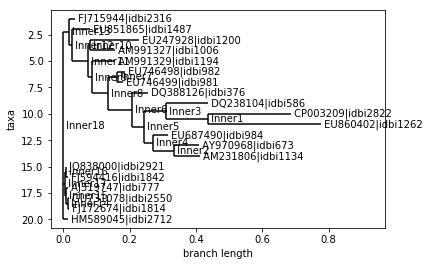

In [168]:
%matplotlib inline
from Bio import Phylo
import pylab
Phylo.draw(my_tree)

### Exercise 1.4

* Create a tree for `inti1.97.fasta`.